<a href="https://colab.research.google.com/github/danielrodriguez007/Data-Science/blob/main/Rappi_Analytics_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data 📚

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
plt.style.use('fivethirtyeight')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/orders (2022).csv')
data.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
0,14364873,30000009,2.478101,-72.719360,4200.0,2017-09-07T20:02:17Z,0
1,14370123,30000058,0.451711,37.754761,4200.0,2017-09-07T20:13:16Z,0
2,14368534,900003684,2.026072,207.191162,4000.0,2017-09-07T20:07:23Z,0
3,14369923,900014085,0.965496,117.429199,3450.0,2017-09-07T20:12:14Z,1
4,14367859,900004363,0.577156,-7.895874,5200.0,2017-09-07T20:13:16Z,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125549 entries, 0 to 125548
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           125549 non-null  int64  
 1   store_id           125549 non-null  int64  
 2   to_user_distance   125549 non-null  float64
 3   to_user_elevation  125549 non-null  float64
 4   total_earning      125549 non-null  float64
 5   created_at         125549 non-null  object 
 6   taken              125549 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 6.7+ MB


In [ ]:
np.around(data.describe(),2)

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,taken
count,125549.00,1.255490e+05,125549.00,125549.00,125549.00,125549.00
mean,15078383.65,7.485716e+08,1.48,27.37,5374.31,0.92
std,475262.86,3.298381e+08,0.85,84.82,1784.92,0.27
min,14210727.00,3.000000e+07,0.00,-260.33,0.00,0.00
25%,14672553.00,9.000043e+08,0.81,-18.42,4200.00,1.00
50%,15093673.00,9.000077e+08,1.36,11.78,5200.00,1.00
75%,15475515.00,9.000127e+08,2.00,62.98,6400.00,1.00
max,15902524.00,9.000173e+08,9.36,975.23,108200.00,1.00


# 2.1 Exploration, Cleaning and Plotting Data 🕵

In [ ]:
#Looking for null values into the dataset
data.isnull().sum()

order_id             0
store_id             0
to_user_distance     0
to_user_elevation    0
total_earning        0
created_at           0
taken                0
dtype: int64

In [ ]:
data.shape

(125549, 7)

In [ ]:
#Looking the minimum and maximum date
print(data['created_at'].min(),'\n',data['created_at'].max())

2017-09-05T00:01:02Z 
 2017-10-04T23:58:53Z


In [ ]:
data['to_user_distance'] = data['to_user_distance'].astype(int)

In [ ]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [ ]:
#Create new columns from the "created_at" column
data['Month'] = data['created_at'].apply(lambda x:x.month).astype(int)
data['Day'] = data['created_at'].apply(lambda x:x.day).astype(int)
data['Hour'] = data['created_at'].apply(lambda x:x.hour).astype(int)
data['Dayweek'] = data['created_at'].apply(lambda x:x.weekday).astype(int)

In [ ]:
#Cast column into a datetime type
data['created_at'] = pd.to_datetime(data['created_at'])

In [ ]:
#Map day number with name being 0 Monday
data['WeekDay'] = data['Dayweek'].map({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",
                                       4:"Friday",5:"Saturday",6:"Sunday"})

In [ ]:
#New Column
data['TAKEN'] = data['taken'].map({0:'No taken',1:'Taken'})

In [ ]:
#Split dataframe into 2 taken and not taken
data_taken = data.query("taken==1")
data_notaken = data.query("taken==0")

## Insight N°1

## Fig.1

Almost total of orders registered was between 07:00 and 21:00 however the hours with most orders  were 12:00-13:59 and 19:00-20:59 of the days 1,10,17,24,26 and 30

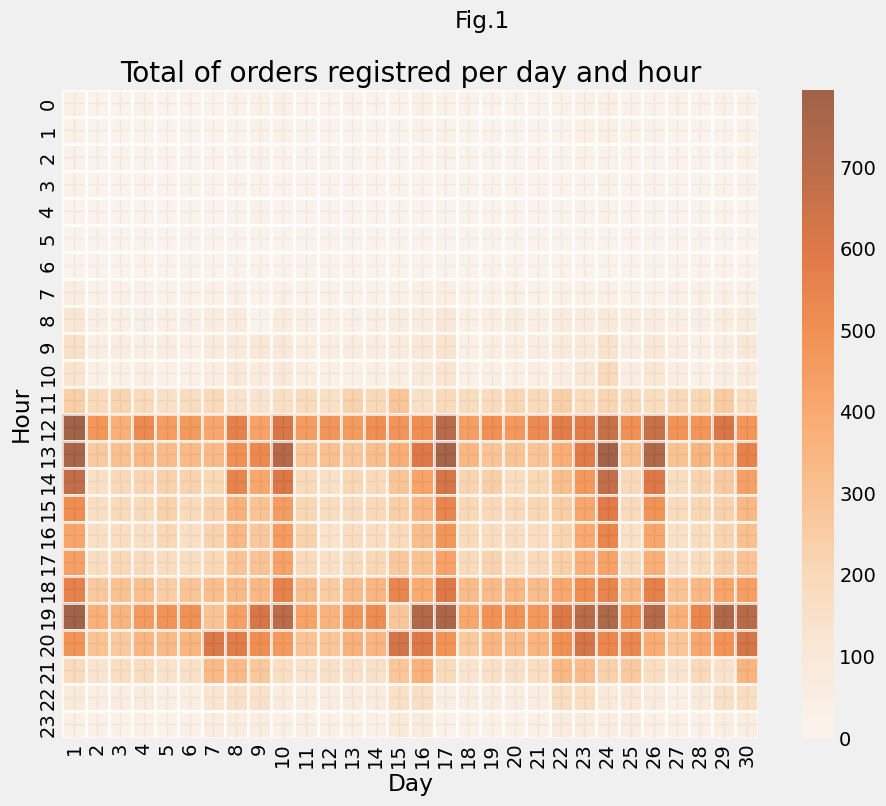

In [ ]:
#Q of orders by day and hour

pv_totalorders =data.pivot_table(index='Hour', columns='Day', values='order_id', aggfunc='count').fillna(0)
plt.figure(figsize=(10,8))
sns.heatmap(pv_totalorders,linewidths=2, linecolor='#FFFFFF', cmap='Oranges',alpha=0.7)
plt.title("Total of orders registred per day and hour")
plt.suptitle("Fig.1")
plt.show()

## Insight N°2

## Fig.2

The week days with most orders registered were Sunday and Saturday in the hours said before, 12:00-13:59 and 19:00-20:59 but for Sunday all day was constant

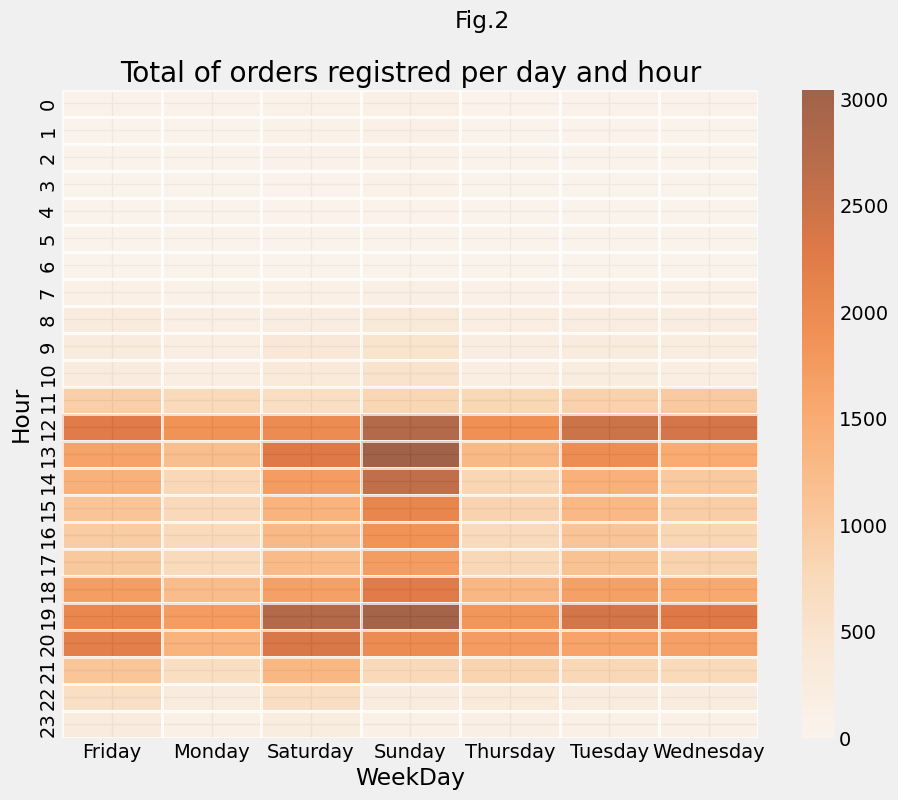

In [ ]:
#Q orders per weekday and hour

pv_weekday =data.pivot_table(index='Hour', columns='WeekDay', values='order_id', aggfunc='count').fillna(0)
plt.figure(figsize=(10,8))
sns.heatmap(pv_weekday,linewidths=2, linecolor='#FFFFFF', cmap='Oranges',alpha=.7)
plt.title("Total of orders registred per day and hour")
plt.suptitle("Fig.2")
plt.show()

## Insight N°3

## Fig.3

I want to know if the most part of the orders not taken was due distance between the store and the client but that is not the case even couriers not taken order with only 1 meters of distance, however the orders were not taken on Saturday a day with a lot of orders

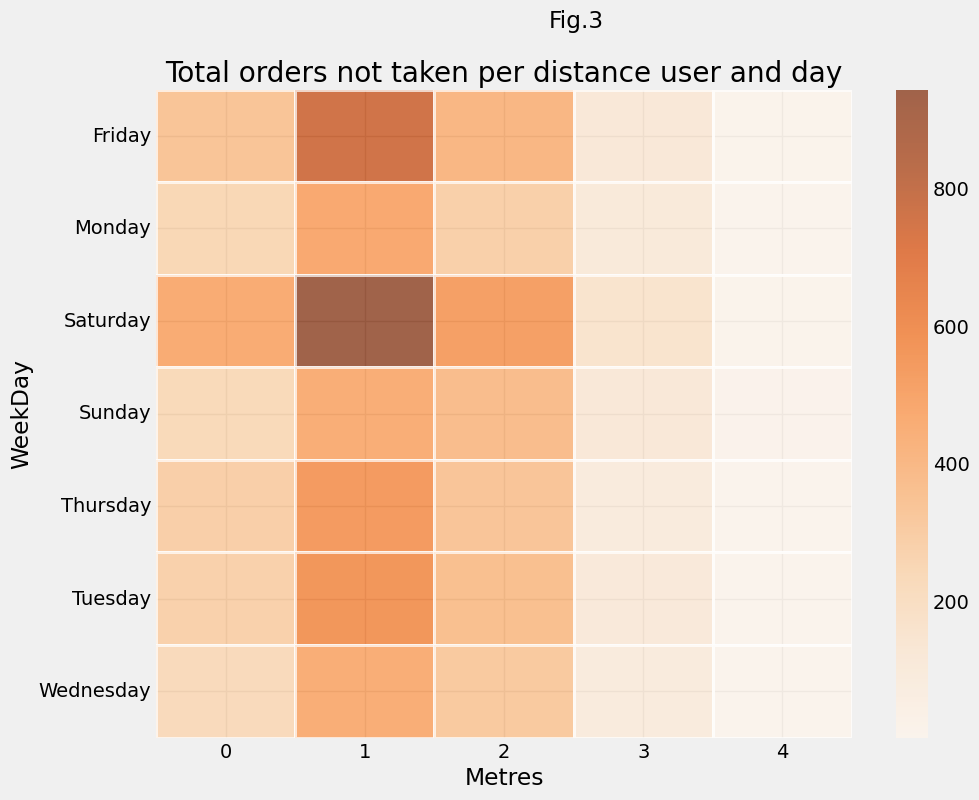

In [ ]:
#Q orders not taken per distance user and weekday

pv_distance =data_notaken.pivot_table(index='WeekDay', columns='to_user_distance', values='order_id', aggfunc='count').fillna(0)
plt.figure(figsize=(10,8))
sns.heatmap(pv_distance,linewidths=2, linecolor='#FFFFFF', cmap='Oranges',alpha=.7)
plt.title("Total orders not taken per distance user and day")
plt.suptitle("Fig.3")
plt.xlabel("Metres")
plt.show()

## Insight N°4

## Fig.4

Let's continue with the orders taken and not taken, in the chart above found that of 100% of the orders registered **125549** , **9689** was not taken a **7.7%** and **115860** was taken **92.3%**

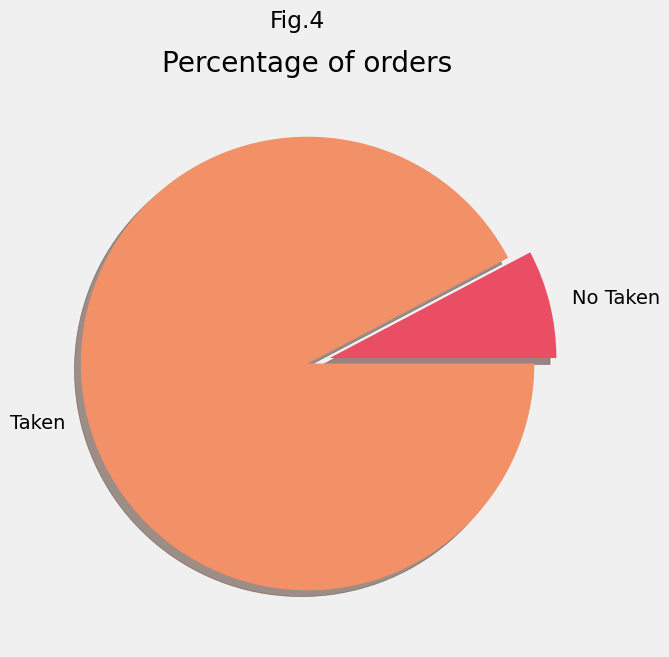

In [ ]:
#Percentage of orders taken

taken = data.groupby(['taken'])['order_id'].count()

colors =['#EA4E64','#F29068']
explode =[0.1,0]
labels =['No Taken','Taken']

plt.figure(figsize=(7,7))
plt.pie(taken.values,labels=labels, shadow=True,colors=colors, explode=explode)
plt.title('Percentage of orders')
plt.suptitle("Fig.4")
plt.show()

## Insight N°5

## Fig.5

If I was to see the process in one week and count the orders taken and not taken in percentage We will see that more of 90% of the orders were taken









  
    



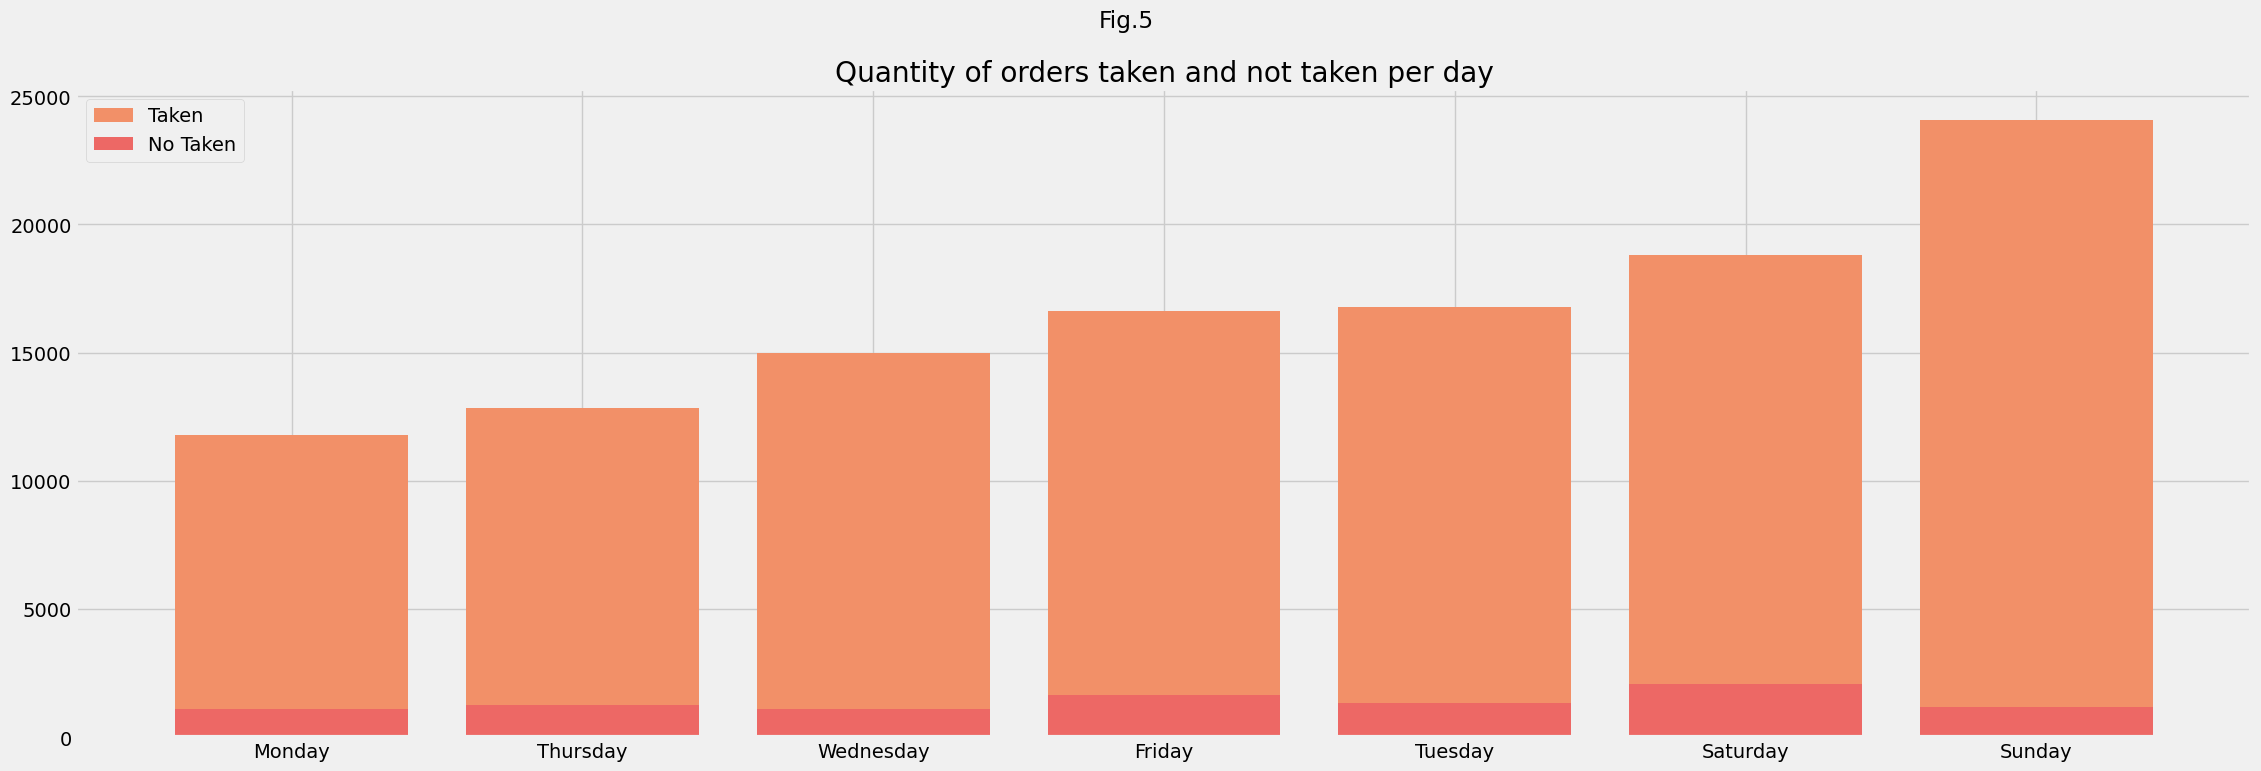

In [ ]:
aw = data_taken.groupby(['WeekDay'])['order_id'].count().sort_values()
bw = data_notaken.groupby(['WeekDay'])['order_id'].count()

plt.figure(figsize=(25,8))
plt.bar(aw.index,aw.values, color="#F29068", label="Taken")
plt.bar(bw.index,bw.values, color="#ED6865", label="No Taken")
plt.title("Quantity of orders taken and not taken per day")
plt.suptitle("Fig.5")
plt.legend()
plt.show()

## Insight N°6

## Fig.6
For the orders that were not taken We have the distribution per day:

*   Monday 9.4%

---


*   Tuesday 7.8%

---


*   Wednesday 7.28%

---


*   Thursday 9.74%

---


*   Friday  9.80%

---


*   Saturday 11.12%   

---


*   Sunday 4.94%

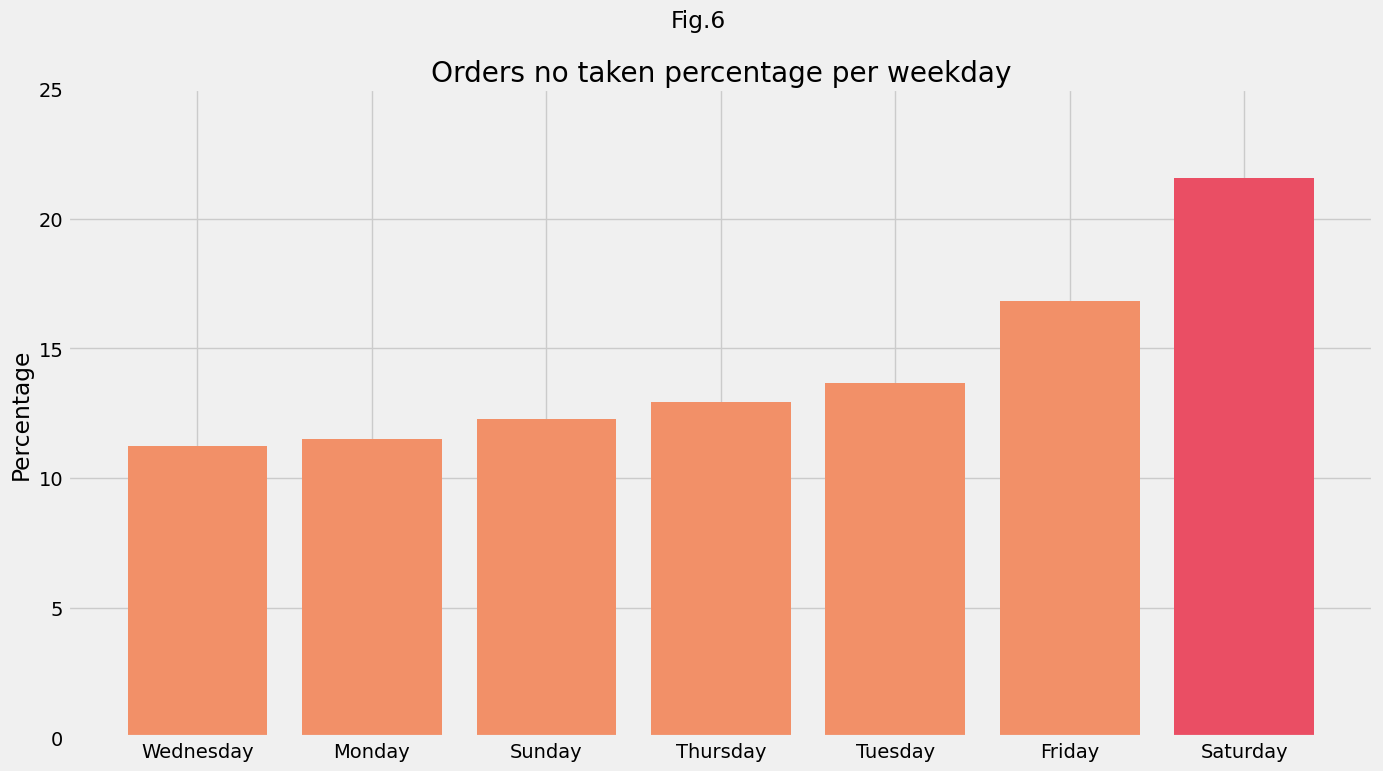

In [ ]:
#Percentage of orders no taken per weekday

dnt = np.round(((data_notaken.groupby(['WeekDay'])["order_id"]
                 .count())
                 .sort_values()/data_notaken.shape[0])*100,2)

colors = ['#F29068','#F29068','#F29068','#F29068','#F29068','#F29068','#EA4E64']
plt.figure(figsize=(15,8))
plt.bar(dnt.index,dnt.values, color=colors)
plt.ylim(0,25)
plt.ylabel("Percentage")
plt.title("Orders no taken percentage per weekday")
plt.suptitle("Fig.6")
plt.show()

## Insight N°7

## Fig.7

In the next chart We can see positive association but moderate between total earning and the distance of the user

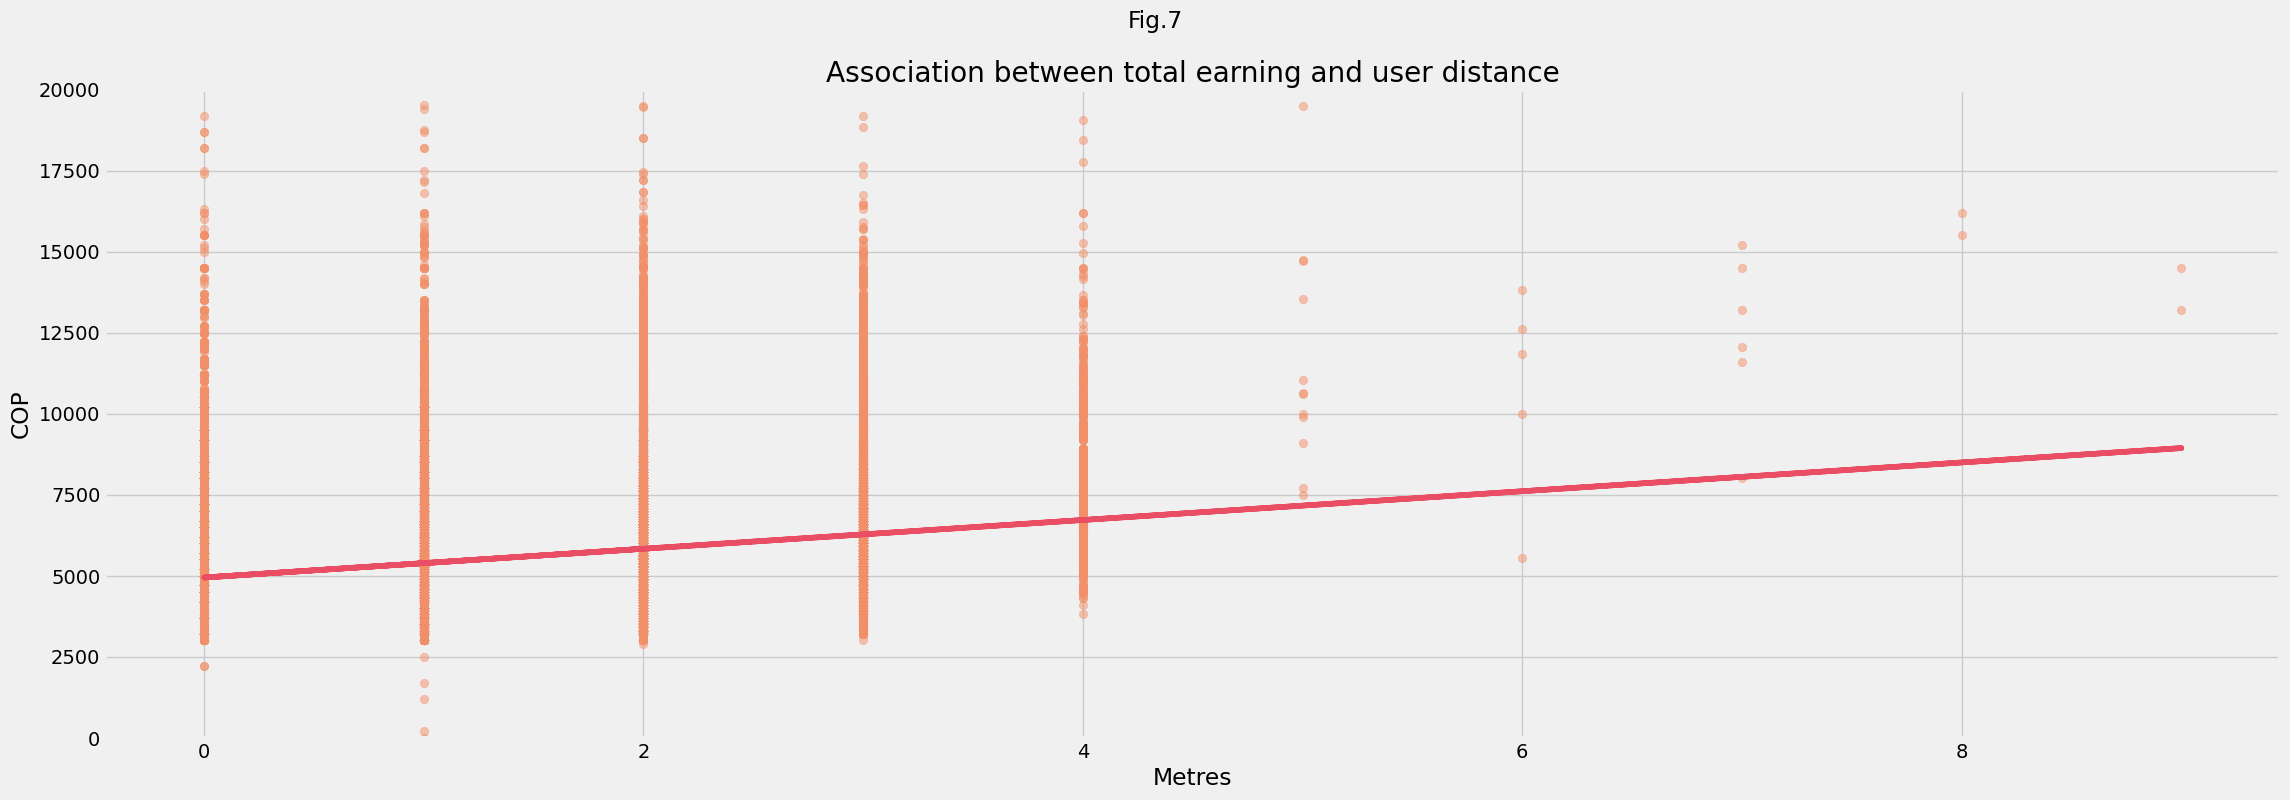

In [ ]:
#Looking for a relation between total earning and user distance
x = data['to_user_distance']
y = data['total_earning']
z = np.polyfit(x,y,1)
p = np.poly1d(z)


plt.figure(figsize=(25,8))
plt.scatter(x,y,color='#F29068',alpha=.5)
plt.plot(x,p(x), color='#EA4E64')
plt.ylim(0,20000)
plt.xlabel("Metres")
plt.ylabel("COP")
plt.title("Association between total earning and user distance")
plt.suptitle("Fig.7")
plt.show()

## Insight N°8

## Fig.8

We can see positive association but weak between total earning and the user elevation

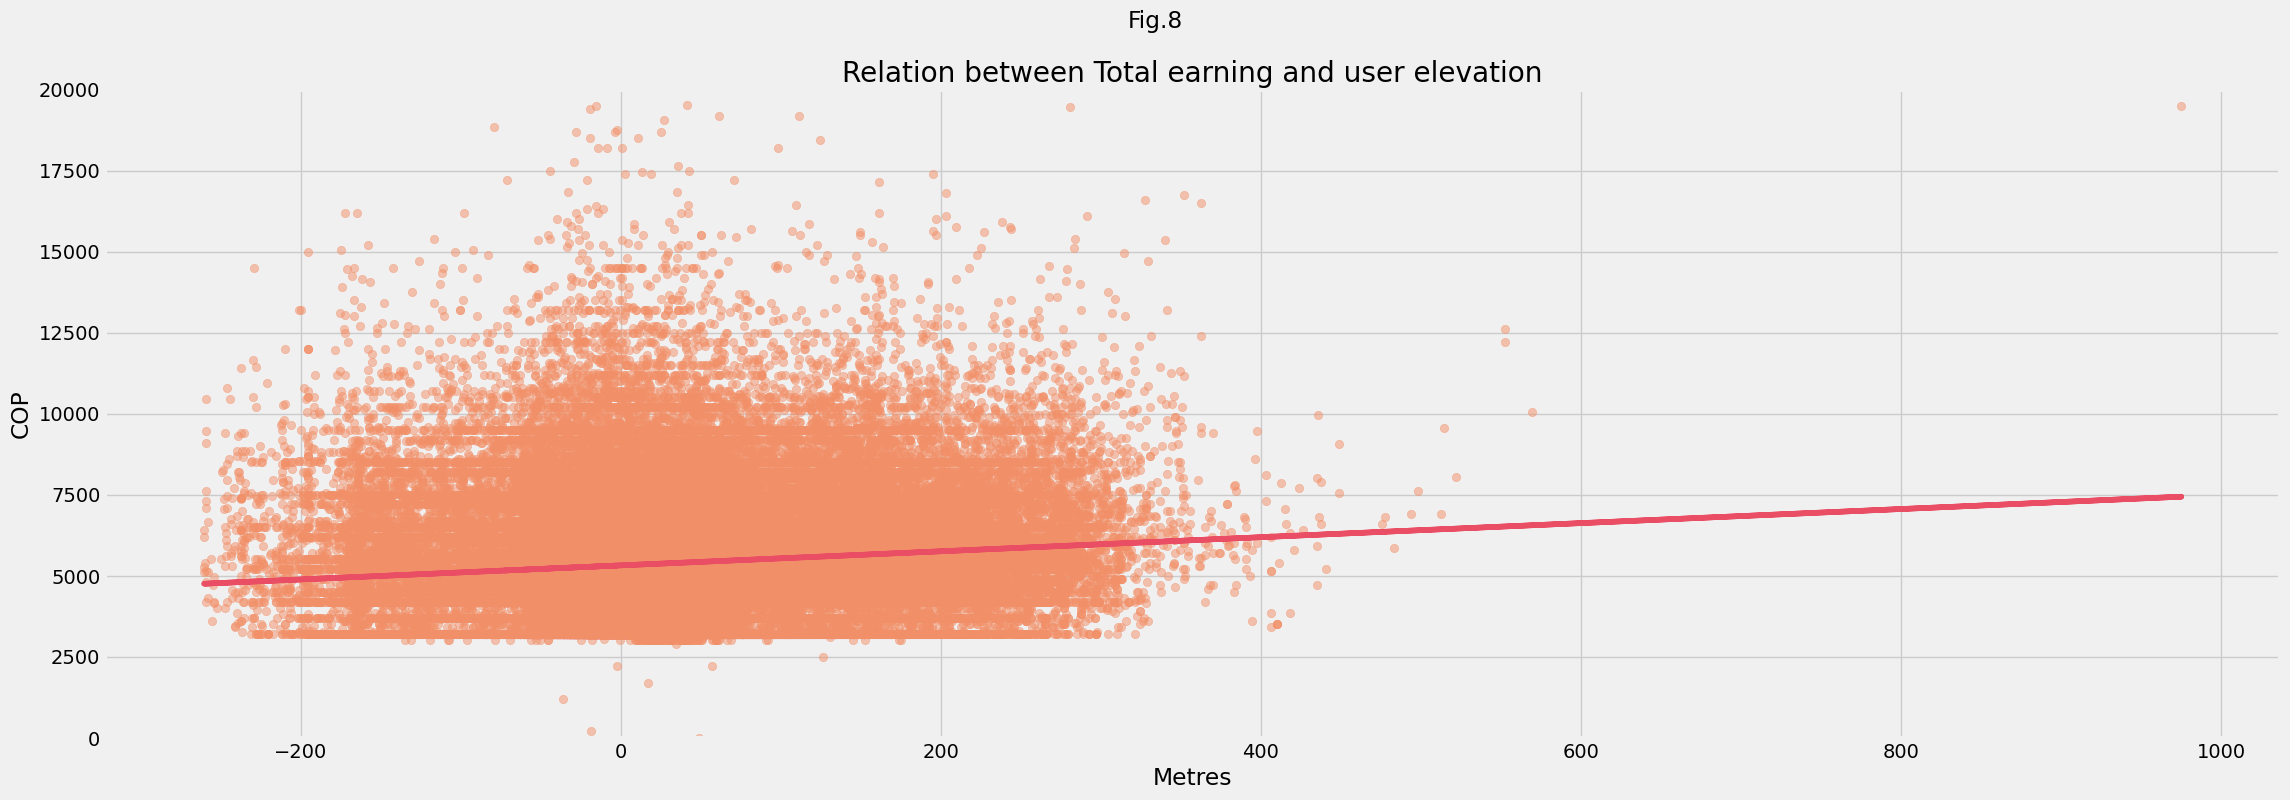

In [ ]:
#Looking for a relation between total earning and user elevation

x = data['to_user_elevation']
y = data['total_earning']
z = np.polyfit(x,y,1)
p = np.poly1d(z)


plt.figure(figsize=(25,8))
plt.scatter(x,y,color='#F29068',alpha=.5)
plt.plot(x,p(x), color='#EA4E64')
plt.ylim(0,20000)
plt.xlabel("Metres")
plt.ylabel("COP")
plt.title("Relation between Total earning and user elevation")
plt.suptitle("Fig.8")
plt.show()

## Insight N°9

## Fig.9

And last but not the least let's see  the total earning of the orders taken by days of the week, that is not surprise that Sunday is the day with more earning but this is the total distribution



*   Monday $63.291.914

---


*   Tuesday $98.795.887  

---


*   Wednesday $70.541.266

---


*   Thursday $63.774.063

---


*   Friday  $89.192.683

---


*   Saturday $92.091.273   

---


*   Sunday $147.785.726


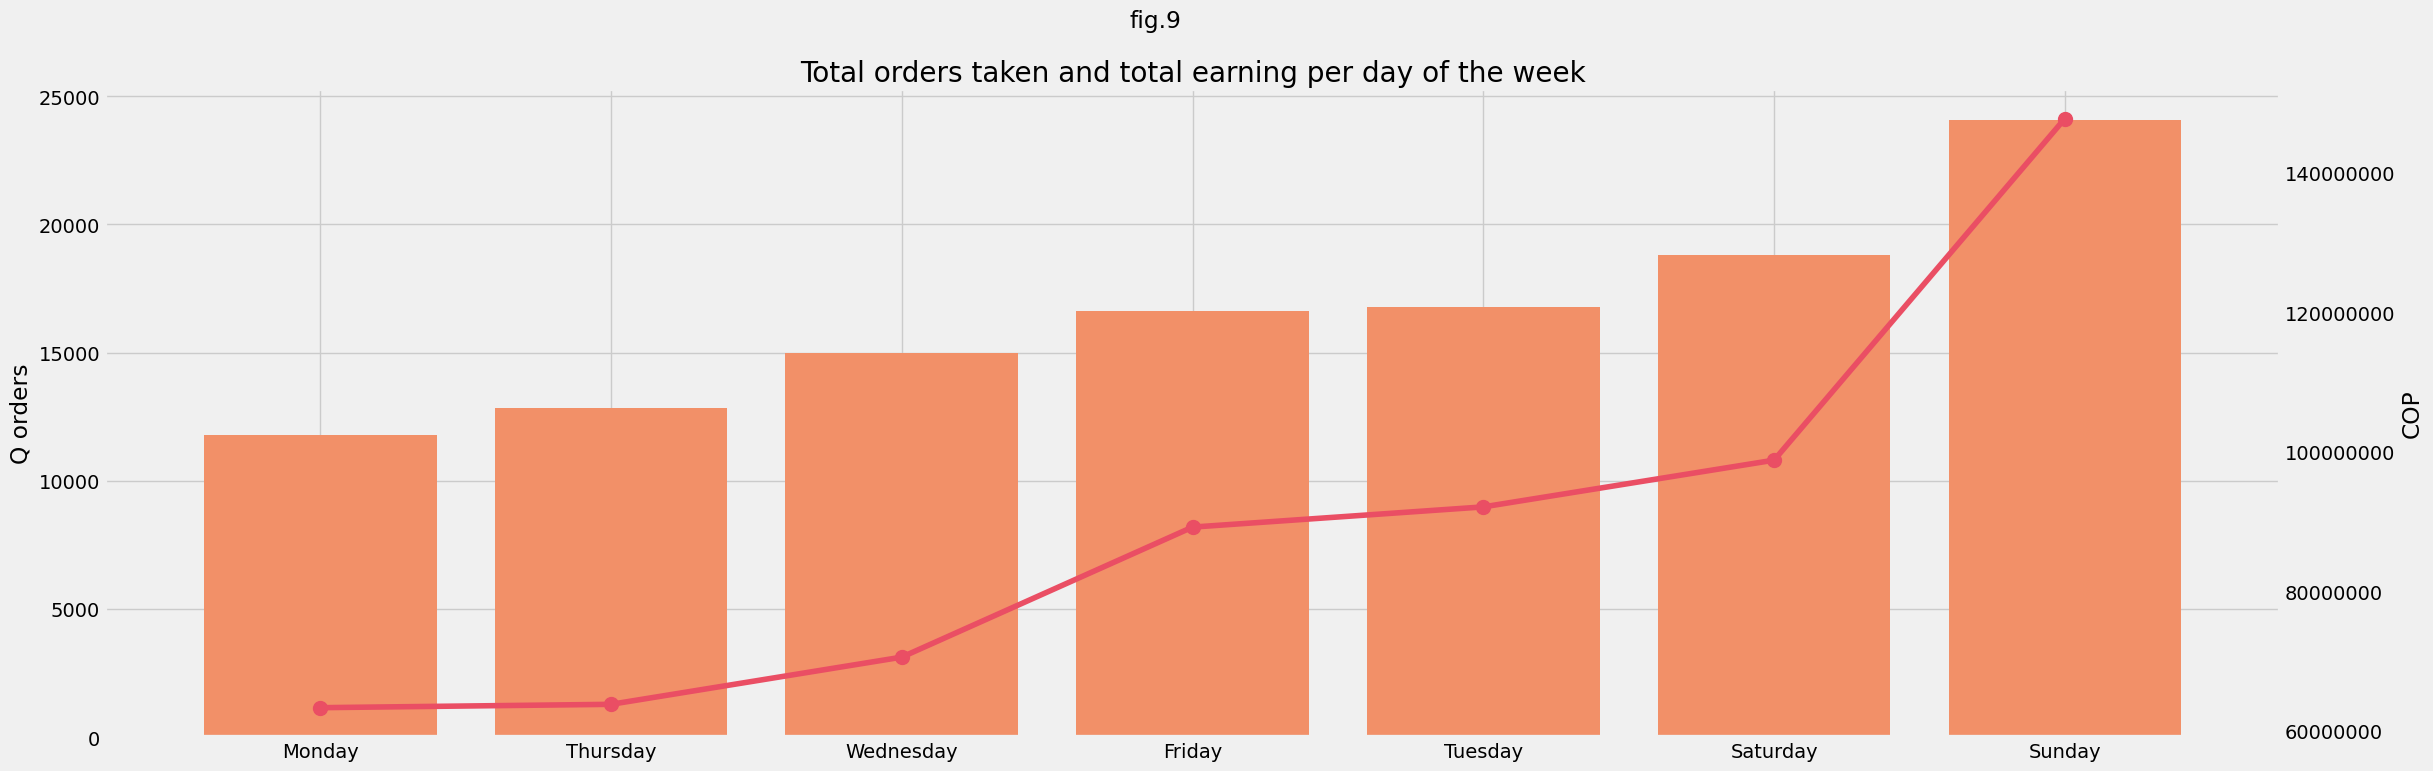

In [ ]:
otd = data_taken.groupby(['WeekDay'])['order_id'].count().sort_values()
ptd = data_taken.groupby(['WeekDay'])['total_earning'].sum().sort_values()

fig = plt.figure(figsize=(25,8))
ax1 = plt.subplot(1,1,1)
ax1.bar(otd.index,otd.values, color="#F29068")
ax1.set_ylabel("Q orders")

ax2=ax1.twinx()
ax2.plot(otd.index,ptd.values, 'o-',color="#EA4E64",markersize=10)
ax2.set_ylabel("COP")

plt.ticklabel_format(axis='y', style='plain')
plt.grid(None)
plt.title("Total orders taken and total earning per day of the week")
plt.suptitle("fig.9")
plt.show()


# 2.2 Machine Learning Model 🤖

In [ ]:
#Correlation between orders taken and the other features in the dataset
correlation = data.corr()
print(correlation['taken'].sort_values(ascending=False))

taken                1.000000
total_earning        0.046902
Dayweek              0.017074
Month                0.013544
to_user_elevation    0.012607
order_id            -0.000800
Day                 -0.015565
store_id            -0.019319
Hour                -0.031513
to_user_distance    -0.081151
Name: taken, dtype: float64


<ipython-input-139-d4bd27da0b1c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


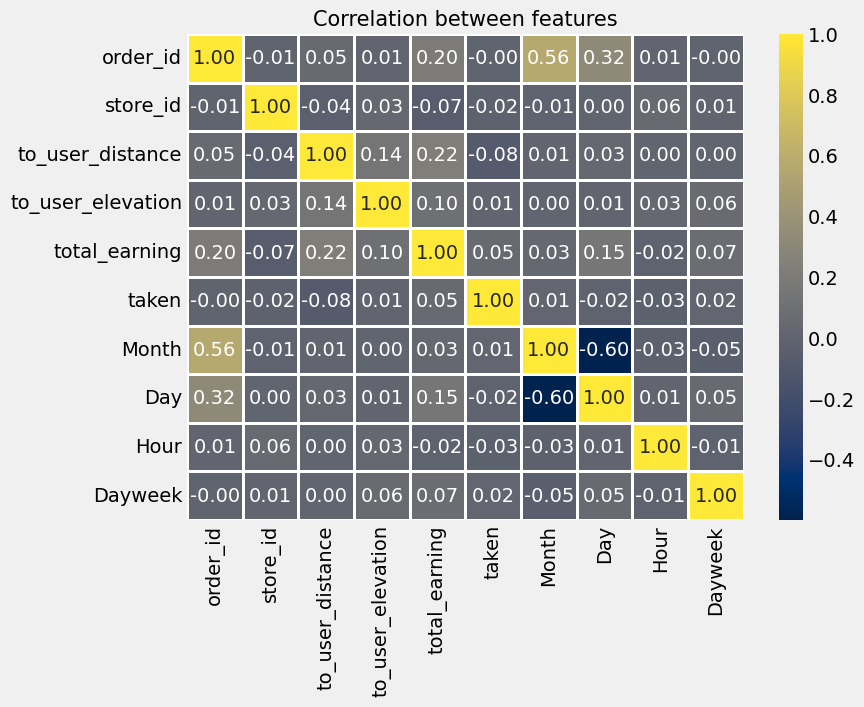

In [ ]:
#Plotting correlation to get the big picture
plt.figure(figsize=(8,6))
sns.heatmap(correlation,linewidths=2,linecolor='#FFFFFF', annot=True,fmt=".2f", cmap='cividis')
plt.title("Correlation between features", fontsize=15)
plt.show()

In [ ]:
#Getting the max and min values of the features chosen
print(
    "Total Earning Min:",data['total_earning'].min(),"Total Earning Max:",data['total_earning'].max(),'\n'
    "Dayweek Min:",data['Dayweek'].min(),"Dayweek Max:",data['Dayweek'].max(),'\n'
    "to_user_elevation Min: ",data['to_user_elevation'].min(),"to_user_elevation Max: ",data['to_user_elevation'].max(),'\n')

Total Earning Min: 0.0 Total Earning Max: 108200.0 
Dayweek Min: 0 Dayweek Max: 6 
to_user_elevation Min:  -260.33312988281205 to_user_elevation Max:  975.22607421875 



In [ ]:
#Setting variables for prediction
x = np.array(data[['total_earning','Dayweek','to_user_elevation']])
y = np.array(data['TAKEN'])

In [ ]:
print("x:",x.shape,"y:",y.shape)

x: (125549, 3) y: (125549,)


In [ ]:
#Splitting Data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)

In [ ]:
print('x_train: ', x_train.shape,'y_train: ',y_train.shape)

x_train:  (100439, 3) y_train:  (100439,)


In [ ]:
from sklearn.linear_model import LogisticRegression

#features 'total_earning','Dayweek','to_user_elevation'
features = np.array([[3700,3,-9.042358]])

model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(features)

print("Predictions of the model: ",predictions)
print("Accuracy of the model:",np.round(model.score(x_test,y_test),2)*100,"%")

Predictions of the model:  ['Taken']
Accurancy of the model: 92.0 %


## APPROACH

I choose a Linear Regression model because I needed to predict a category in this case if the order was taken or not but I've taking far away and build a Supervised Machine Learning model because We only have a piece of the information and with more orders the model can be trained and gain accuracy,however with the actual data, the model have **92%** of accuracy.

To build the model I chose the features 'total_earning','Dayweek','to_user_elevation' that based in the heatmap they have a strong correlation with the column 'taken'.

So this is how I can use Data Science skills for the task of taken orders analysis using Python.
According to the taken orders analysis, we can say that features like 'total_earning','Dayweek','to_user_elevation' impact directly into the decision of the courier to take the order or not.

#2.3

With the insight gained from orders analysis, Rappi can make data-driven decisions to increase the number of orders taken by couriers. The analysis allow Rappi to understand the factors that influence the likelihood of an orders being accepted by couriers and for Rappi to take targeted actions.

Also with the insights gained from the analysis, Rappi can enhance the order acceptance rates of it's couriers, optimize operations and improve satisfaction of the clients ensuring order delivery






#2.4

With the model Rappi can feeding it with new data to increase the accuracy and knowing which order was accepting or not therefore Rappi can take targeted action like:



1.   Identify key predictors
2.   Optimize order allocation
3.   Incentive programs for couriers
4.   Real time decision making to adynamically assign orders
5.   Continuos model refinement to improve predictive capabilities









